# Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# DataMod

In [60]:
data = pd.read_csv("data.csv")
data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [61]:
data.drop(['id', 'day'], axis=1, inplace=True, errors='ignore')
data.fillna(data.median(), inplace=True)

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('rainfall', axis=1))
y = data['rainfall']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Сохранение баланса классов
)

# Models

In [64]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

## Полносвязная

In [65]:
model_fnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

d:\PyInterpreters\Big_data\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_fnn = model_fnn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50


1401/1401 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8249 - loss: 0.4190 - val_accuracy: 0.8604 - val_loss: 0.3418
Epoch 2/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8678 - loss: 0.3512 - val_accuracy: 0.8746 - val_loss: 0.3155
Epoch 3/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8638 - loss: 0.3470 - val_accuracy: 0.8689 - val_loss: 0.3528
Epoch 4/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.3426 - val_accuracy: 0.8689 - val_loss: 0.3258
Epoch 5/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8772 - loss: 0.3368 - val_accuracy: 0.8689 - val_loss: 0.3382
Epoch 6/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8698 - loss: 0.3260 - val_accuracy: 0.8604 - val_loss: 0.3296
Epoch 7/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8815 - loss: 0.3215 - val_accuracy: 0.8803 - val_loss: 0.3449
Epoch 8/50
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 0.3192 - val_accurac

In [67]:
y_pred_fnn = model_fnn.predict(X_test)
y_pred_fnn = (y_pred_fnn > 0.5).astype(int)
print(classification_report(y_test, y_pred_fnn))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_fnn))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       108
           1       0.88      0.94      0.91       330

    accuracy                           0.86       438
   macro avg       0.83      0.78      0.80       438
weighted avg       0.86      0.86      0.86       438



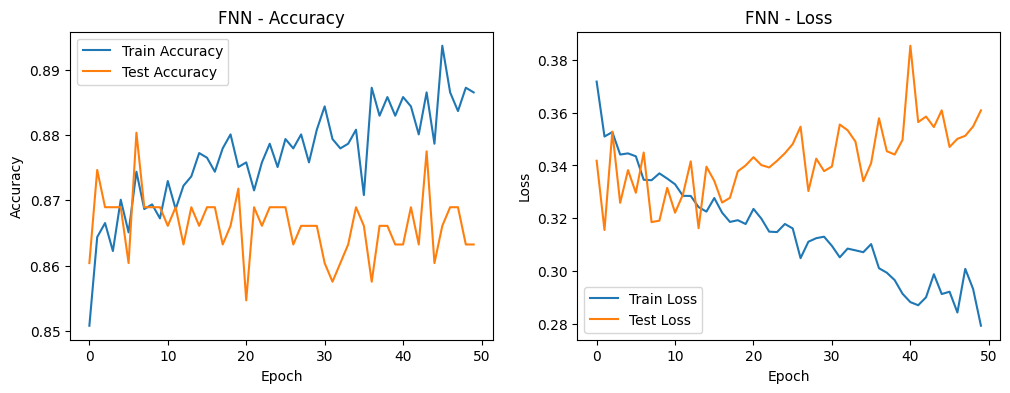

In [68]:
plot_results(history_fnn, "FNN")

## RNN

In [69]:
def create_sequences(data, targets, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(targets[i + 1 : i + window_size + 1])  # Прогноз на следующие 7 дней
    return np.array(X), np.array(y)


window_size = 7
X_rnn, y_rnn = create_sequences(X, y, window_size)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    X_rnn, y_rnn, test_size=0.2, shuffle=False
)

In [70]:
model_rnn = Sequential([
    LSTM(64, input_shape=(window_size, X_train.shape[1]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(7, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

d:\PyInterpreters\Big_data\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
history_rnn = model_rnn.fit(
    X_train_rnn, y_train_rnn,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1189 - loss: 0.5923 - val_accuracy: 0.4571 - val_loss: 0.4854
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3208 - loss: 0.4935 - val_accuracy: 0.3029 - val_loss: 0.4700
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2197 - loss: 0.4860 - val_accuracy: 0.1686 - val_loss: 0.4525
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2460 - loss: 0.4636 - val_accuracy: 0.1800 - val_loss: 0.4416
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2235 - loss: 0.4522 - val_accuracy: 0.1600 - val_loss: 0.4427
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1723 - loss: 0.4425 - val_accuracy: 0.2229 - val_loss: 0.4362
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1591 - loss: 0.4251 - val_accuracy: 0.1771 - val_loss: 0.4282
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1720 - loss: 0.4316 - val_accuracy: 0.

In [72]:
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)
# Оценка для каждого из 7 дней
for i in range(7):
    print(f"Day {i+1}:")
    print(classification_report(y_test_rnn[:, i], y_pred_rnn[:, i]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Day 1:
              precision    recall  f1-score   support

           0       0.60      0.55      0.58        92
           1       0.88      0.90      0.89       345

    accuracy                           0.83       437
   macro avg       0.74      0.73      0.73       437
weighted avg       0.82      0.83      0.83       437

Day 2:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63        92
           1       0.90      0.90      0.90       345

    accuracy                           0.84       437
   macro avg       0.76      0.76      0.76       437
weighted avg       0.84      0.84      0.84       437

Day 3:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        92
           1       0.89      0.86      0.88       345

    accuracy                           0.81       437
   macro avg       0.72      0.74      0.73       437
weighted avg 

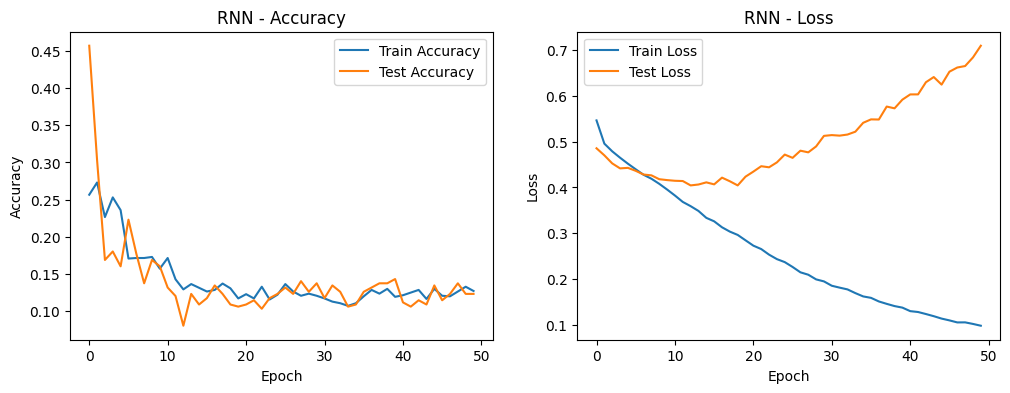

In [73]:
plot_results(history_rnn, "RNN")